In [28]:
#Classifying Bean Types With Decision Tree Models
#
#Patrick Krol
#CS 422: Data Mining



import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

df = pd.read_excel(r'C:\Users\pdkro\OneDrive\Desktop\Fall 2022\Data Mining\Term Proj\Dry_Bean_Dataset.xlsx')

In [32]:
#Function for making a decision tree
#
#df: dataframe being used
#fraction: what fraction of the database do you want to use for the making of the tree?
#features: attributes to include in the tree

def BeanForest(df, fraction, features):
    testdf = df.sample(frac = fraction)
    validf = df.drop(testdf.index)

    testdf['Class'].replace(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'],[0,1,2,3,4,5,6], inplace = True)
    validf['Class'].replace(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'],[0,1,2,3,4,5,6], inplace = True)
    X = testdf[features]
    Y = testdf['Class']
    X2 = validf[features]
    Y2 = validf['Class']
    treeko = tree.DecisionTreeClassifier()
    treeko = treeko.fit(X,Y)
    
    counter= [0,0,0,0,0,0,0]
    for i in range(len(validf.index)):
        if treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 0:
            counter[0] +=1
        
        elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 1:
            counter[1] +=1

        elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 2:
            counter[2] +=1
        
        elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 3:
            counter[3] +=1

        elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 4:
            counter[4] +=1
        
        elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 5:
            counter[5] +=1
        
        elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 6:
            counter[6] +=1
            
    return sum(counter)/len(validf.index)

features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
print(BeanForest(df,.7, features))


0.8990938035758022


In [36]:
#solution?
#create seperate tree to classify each bean type
# SEKER Y/N ...
#calculate ability to classify each bean type then average for overall accuracy

#separates out which bean type you want to make a tree of
#df: dataframe being used
#beantype: which bean type do you want to use?
#fracbean: fraction of df of specified type used in tree making
#fracnbean: fraction of df w/o specified type used in tree making

def BeanSeparator(df, beantype, fracbean, fracnbean):
    #Separate out bean type
    bean = df[df['Class'] == beantype]
    nbean = df.drop(bean.index)
    nbean = nbean.sample(frac = 1)
    
    #to binary
    bean = bean.assign(Class = 1)
    nbean = nbean.assign(Class = 0)
    
    #sample each
    beantest = bean.sample(frac = fracbean)
    nbeantest = nbean.sample(frac = fracnbean)
    
    beanvalidation = bean.drop(beantest.index)
    nbeanvalidation = nbean.drop(nbeantest.index)
    
    test = beantest.append(nbeantest, ignore_index = True)
    validate = beanvalidation.append(nbeanvalidation, ignore_index = True)
    
    return test, validate

#creates the tree
#test: df used in tree making
#validate: df used to validate that tree works

def BeanTree(test, validate):

    features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
    x = test[features]
    y = test['Class']
    x2= validate[features]
    y2= validate['Class']
    tree = DecisionTreeClassifier()
    tree = tree.fit(x, y)
    counter=0
    for i in range(len(validate.index)):
        if tree.predict([x2.iloc[i].tolist()]) == y2.iloc[i].tolist():
            counter +=1
    return counter/len(validate)

In [37]:
#singular tree testing

f1 = .6
f2 = .6

sektest, sekval = BeanSeparator(df,'SEKER', f1, f2)
barbtest, barbval = BeanSeparator(df, 'BARBUNYA', f1, f2)
bombtest, bombval = BeanSeparator(df, 'BOMBAY', f1, f2)
calitest, calival = BeanSeparator(df, 'CALI', f1, f2)
hortest, horval = BeanSeparator(df, 'HOROZ', f1, f2)
siratest, siraval = BeanSeparator(df, 'SIRA', f1, f2)
dertest, derval = BeanSeparator(df, 'DERMASON', f1, f2)

sek = BeanTree(sektest,sekval)
barb = BeanTree(barbtest,barbval)
bomb = BeanTree(bombtest, bombval)
cali = BeanTree(calitest, calival)
hor = BeanTree(hortest, horval)
sir = BeanTree(siratest, siraval)
der = BeanTree(dertest, derval)
avg = (sek+barb+bomb+cali+hor+sir+der)/7

print('Seker Accuracy', sek)
print('Barbunya Accuracy', barb)
print('Bombay Accuracy', bomb)
print('Cali Accuracy', cali)
print('Horoz Accuracy', hor)
print('Sira Accuracy', sir)
print('Dermason Accuracy', der)
print('Avg Accuracy', avg)

Seker Accuracy 0.9768595041322314
Barbunya Accuracy 0.9768595041322314
Bombay Accuracy 1.0
Cali Accuracy 0.9750183688464364
Horoz Accuracy 0.9763041880969875
Sira Accuracy 0.9311168258633358
Dermason Accuracy 0.9426891991182954
Avg Accuracy 0.9684067985985026


<AxesSubplot:xlabel='Class', ylabel='count'>

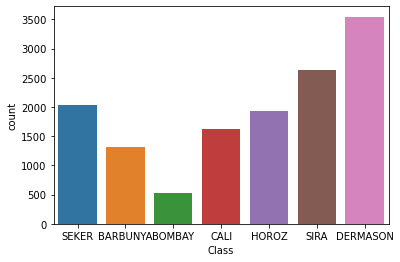

In [30]:
#count of bean types present in df
sb.countplot(data = df, x = 'Class')

In [27]:
#preprocessing: replacing bean type with number to represent each bean
testdf = df.sample(frac = .80)
validf = df.drop(testdf.index)

testdf['Class'].replace(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'],[0,1,2,3,4,5,6], inplace = True)
validf['Class'].replace(['SEKER','BARBUNYA','BOMBAY','CALI','HOROZ','SIRA','DERMASON'],[0,1,2,3,4,5,6], inplace = True)


In [55]:
#main tree
features2 = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
features = ['Area', 'Perimeter', 'AspectRation', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
X = testdf[features]
Y = testdf['Class']
X2 = validf[features]
Y2 = validf['Class']
treeko = tree.DecisionTreeClassifier()
treeko = treeko.fit(X,Y)

counter= [0,0,0,0,0,0,0]
for i in range(len(validf.index)):
    if treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 0:
        counter[0] +=1
        
    elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 1:
        counter[1] +=1

    elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 2:
        counter[2] +=1
        
    elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 3:
        counter[3] +=1

    elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 4:
        counter[4] +=1
        
    elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 5:
        counter[5] +=1
        
    elif treeko.predict([X2.iloc[i].tolist()]) == Y2.iloc[i].tolist() == 6:
        counter[6] +=1

print('Avg', sum(counter)/len(validf.index))
print('Seker',counter[0]/len(validf[validf['Class'] ==0]))
print('Barbunya',counter[1]/len(validf[validf['Class']==1]))
print('Bombay',counter[2]/len(validf[validf['Class']==2]))
print('Cali',counter[3]/len(validf[validf['Class']==3]))
print('Horoz',counter[4]/len(validf[validf['Class']==4]))
print('Sira',counter[5]/len(validf[validf['Class']==5]))
print('Dermason',counter[6]/len(validf[validf['Class']==6]))
print(counter)

Avg 0.9030124908155768
Seker 0.9343832020997376
Barbunya 0.8909090909090909
Bombay 1.0
Cali 0.911042944785276
Horoz 0.9232736572890026
Sira 0.8472727272727273
Dermason 0.9053084648493543
[356, 245, 102, 297, 361, 466, 631]


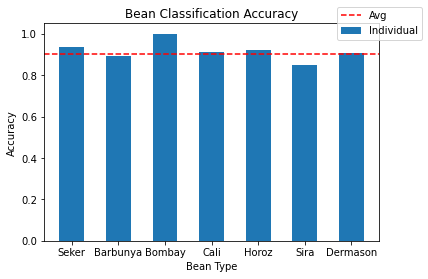

In [56]:
#avg plot
left = [1,2.5,4,5.5,7,8.5,10]
height = [counter[0]/len(validf[validf['Class'] ==0]),counter[1]/len(validf[validf['Class'] ==1]),counter[2]/len(validf[validf['Class'] ==2]),counter[3]/len(validf[validf['Class'] ==3]),counter[4]/len(validf[validf['Class'] ==4]),counter[5]/len(validf[validf['Class'] ==5]),counter[6]/len(validf[validf['Class'] ==6])]
tick_label = ['Seker', 'Barbunya', 'Bombay', 'Cali', 'Horoz','Sira','Dermason']

plt.axhline(y = sum(counter)/len(validf.index), color = 'r', linestyle = 'dashed', label = 'Avg')

plt.bar(left, height, tick_label=tick_label, width = .8, label = 'Individual')
plt.xlabel('Bean Type')
plt.ylabel('Accuracy')
plt.title('Bean Classification Accuracy')
plt.legend(bbox_to_anchor = (1.0, 1.1), loc = 'upper center')
plt.show()

In [127]:
#various data exploration
print('Area avg by class:', df.groupby('Class')['Area'].mean())
print('Perimeter avg by class:', df.groupby('Class')['Perimeter'].mean())
print('Major Axis Length avg by class:', df.groupby('Class')['MajorAxisLength'].mean())
print('Minor Axis Length avg by class:', df.groupby('Class')['MinorAxisLength'].mean())
print('Aspectration avg by class:', df.groupby('Class')['AspectRation'].mean())
print('Eccentricity avg by class:', df.groupby('Class')['Eccentricity'].mean())
print('ConvexArea avg by class:', df.groupby('Class')['ConvexArea'].mean())

Area avg by class: Class
BARBUNYA     69804.133132
BOMBAY      173485.059387
CALI         75538.211043
DERMASON     32118.710942
HOROZ        53648.508817
SEKER        39881.299951
SIRA         44729.128604
Name: Area, dtype: float64
Perimeter avg by class: Class
BARBUNYA    1046.105764
BOMBAY      1585.619079
CALI        1057.634282
DERMASON     665.209536
HOROZ        919.859676
SEKER        727.672440
SIRA         796.418737
Name: Perimeter, dtype: float64
Major Axis Length avg by class: Class
BARBUNYA    370.044279
BOMBAY      593.152075
CALI        409.499538
DERMASON    246.557279
HOROZ       372.570290
SEKER       251.291957
SIRA        299.380258
Name: MajorAxisLength, dtype: float64
Minor Axis Length avg by class: Class
BARBUNYA    240.309352
BOMBAY      374.352547
CALI        236.370616
DERMASON    165.657143
HOROZ       184.170663
SEKER       201.909653
SIRA        190.800250
Name: MinorAxisLength, dtype: float64
Area avg by class: Class
BARBUNYA    1.544395
BOMBAY      1.58

<AxesSubplot:title={'center':'Area'}, xlabel='Class'>

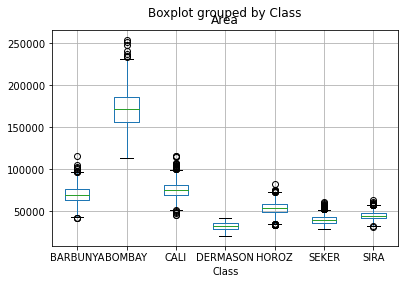

In [16]:
df.boxplot(by ='Class', column =['Area'])

<AxesSubplot:title={'center':'Perimeter'}, xlabel='Class'>

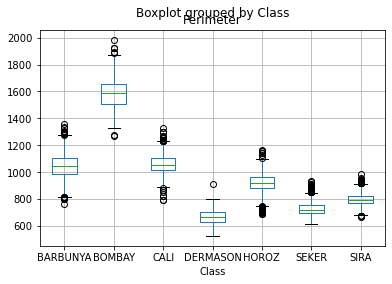

In [17]:
df.boxplot(by ='Class', column =['Perimeter'])

<AxesSubplot:title={'center':'ShapeFactor1'}, xlabel='Class'>

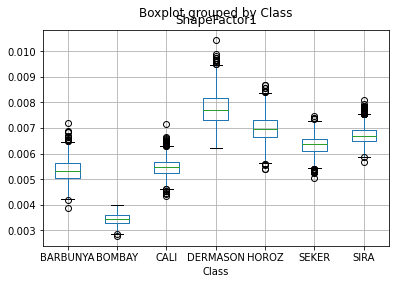

In [23]:
df.boxplot(by ='Class', column =['ShapeFactor1'])

<AxesSubplot:title={'center':'roundness'}, xlabel='Class'>

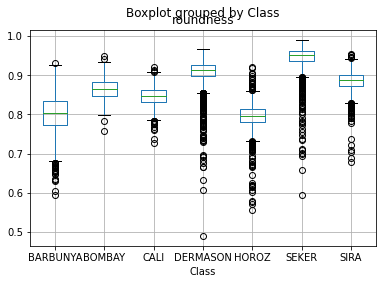

In [25]:
df.boxplot(by ='Class', column =['roundness'])

<AxesSubplot:xlabel='Class', ylabel='roundness'>

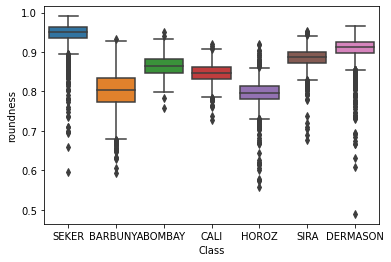

In [26]:
sb.boxplot(x = 'Class', y = 'roundness', data = df)